C:\Users\robot\code\ml\landsat\collate_validation_metrics.py

In [1]:
!conda info


     active environment : tf_grid2.13
    active env location : C:\Users\robot\anaconda3\envs\tf_grid2.13
            shell level : 1
       user config file : C:\Users\robot\.condarc
 populated config files : C:\Users\robot\.condarc
          conda version : 23.7.4
    conda-build version : 3.26.1
         python version : 3.11.5.final.0
       virtual packages : __archspec=1=x86_64
                          __cuda=12.6=0
                          __win=0=0
       base environment : C:\Users\robot\anaconda3  (writable)
      conda av data dir : C:\Users\robot\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.an

In [2]:
import os
import pandas as pd
import math
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown
%matplotlib inline

# Disable scientific notation for pandas display
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [3]:
# Directory path to search through
directory_ = r'H:\biomass'
model_run = "test_train_all04_05"
model_run = "model_all01_02_03_04_05_06_v2"


directory_path = os.path.join(directory_, f"model_{model_run}")

combined_df = pd.read_csv(os.path.join(directory_path, "total_metrics.csv"))

In [4]:
# # Directory path to search through
# directory_ = r'H:\biomass'
# model_run = "test_train_mlp"
# model_run = "test_train_all04_05"
# 
# directory_path = os.path.join(directory_, f"{model_run}")
# 
# combined_df = pd.read_csv(os.path.join(directory_path, "total_metrics.csv"))

## Split into groups based on status

In [5]:
retrain_df = combined_df[combined_df["status"]=="retrain"]
retest_df = combined_df[combined_df["status"]=="retest"]

In [6]:
retest_df

,r2,mse,rmse,mae,mape,bias,n,mdl,status,var,fac,stdev,sel_num,data,stats,features,model,file
0,0.6300000000,42808707.3800000027,6542.8400000000,4377.1700000000,505017505.6200000048,-560.0100000000,34,RFR,retest,all01_rs30,r2,3,40,all0,mean,"['b6_dbi_mean', 'dbi_r42', 'b1_dbi_mean', 'b2_...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_40_variable_score.csv
1,0.6200000000,44050884.3699999973,6637.0800000000,4441.3300000000,477112882.9300000072,-595.9100000000,34,RFR,retest,all01_rs30,r2,3,25,all0,mean,"['b2_dbi_mean', 'b3_dp1_mean', 'b2_dp1_mean', ...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_25_variable_score.csv
2,0.6200000000,43733687.2500000000,6613.1500000000,4653.8600000000,520273567.5099999905,-878.6900000000,34,RFR,retest,all01_rs30,r2,3,20,all0,mean,"['b2_dbi_mean', 'b1_dbi_mean', 'b3_dbi_mean', ...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_20_variable_score.csv
3,0.6200000000,43382831.1599999964,6586.5600000000,4496.1100000000,504887317.9900000095,-480.9400000000,34,RFR,retest,all01_rs30,r2,3,15,all0,mean,"['b3_dbi_mean', 'dbi_GNDVI', 'dbi_RI', 'b2_dp1...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_15_variable_score.csv
4,0.6100000000,44236614.8599999994,6651.0600000000,4562.7400000000,437153953.3899999857,-498.7900000000,34,RFR,retest,all01_rs30,r2,3,12,all0,mean,"['dbi_MSR', 'dbi_NBR', 'dbi_GNDVI', 'b2_dbi_me...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_12_variable_score.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,0.1700000000,57389467.4799999967,7575.5800000000,4844.9200000000,579842854.8999999762,587.5300000000,39,XGBR,retest,all03_rs50,RMSE,3,25,all0,p99,"['b1_n17_dry_major', 'b1_wfp_dry_p99', 'b1_hsd...","XGBRegressor(base_score=None, booster=None, ca...",all03_rs50_RMSE_XGBR_sel_25_variable_score.csv
2876,0.1500000000,58812981.4500000030,7668.9600000000,5035.4800000000,606966883.5000000000,745.2800000000,39,XGBR,retest,all03_rs50,RMSE,3,20,all0,p99,"['b1_hsd_p99', 'b1_h25_p99', 'b1_wdc_dry_major...","XGBRegressor(base_score=None, booster=None, ca...",all03_rs50_RMSE_XGBR_sel_20_variable_score.csv
2877,0.1800000000,56194425.1000000015,7496.2900000000,4707.5600000000,531204486.6100000143,662.9800000000,39,XGBR,retest,all03_rs50,RMSE,3,15,all0,p99,"['b1_wdc_dry_major_en_2', 'b1_h25_p99', 'b1_h9...","XGBRegressor(base_score=None, booster=None, ca...",all03_rs50_RMSE_XGBR_sel_15_variable_score.csv
2878,0.1800000000,56817048.7199999988,7537.7100000000,4892.1300000000,607229833.7799999714,684.9900000000,39,XGBR,retest,all03_rs50,RMSE,3,12,all0,p99,"['b1_hsd_p99', 'b1_hmc_p99', 'b1_ccw_dry_p99',...","XGBRegressor(base_score=None, booster=None, ca...",all03_rs50_RMSE_XGBR_sel_12_variable_score.csv


# Join Validation and Train together

In [7]:
df_merged = pd.merge(retrain_df, retest_df, on=['mdl', 'model', 'sel_num', 'fac', 'var', 'file', 'stats', 'data', 'stdev'], how='outer')

In [8]:
# Rename columns containing "_x" to "validation" and "_y" to "train"
df_merged.columns = df_merged.columns.str.replace('_x', '_retrain').str.replace('_y', '_retest')
df_merged

,r2_retrain,mse_retrain,rmse_retrain,mae_retrain,mape_retrain,bias_retrain,n_retrain,status_retrain,features_retrain,r2_retest,...,status_retest,var,fac,stdev,sel_num,data,stats,features_retest,model,file
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6300000000,...,retest,all01_rs30,r2,3,40,all0,mean,"['b6_dbi_mean', 'dbi_r42', 'b1_dbi_mean', 'b2_...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_40_variable_score.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6200000000,...,retest,all01_rs30,r2,3,25,all0,mean,"['b2_dbi_mean', 'b3_dp1_mean', 'b2_dp1_mean', ...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_25_variable_score.csv
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6200000000,...,retest,all01_rs30,r2,3,20,all0,mean,"['b2_dbi_mean', 'b1_dbi_mean', 'b3_dbi_mean', ...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_20_variable_score.csv
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6200000000,...,retest,all01_rs30,r2,3,15,all0,mean,"['b3_dbi_mean', 'dbi_GNDVI', 'dbi_RI', 'b2_dp1...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_15_variable_score.csv
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6100000000,...,retest,all01_rs30,r2,3,12,all0,mean,"['dbi_MSR', 'dbi_NBR', 'dbi_GNDVI', 'b2_dbi_me...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_12_variable_score.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1700000000,...,retest,all03_rs50,RMSE,3,25,all0,p99,"['b1_n17_dry_major', 'b1_wfp_dry_p99', 'b1_hsd...","XGBRegressor(base_score=None, booster=None, ca...",all03_rs50_RMSE_XGBR_sel_25_variable_score.csv
2876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1500000000,...,retest,all03_rs50,RMSE,3,20,all0,p99,"['b1_hsd_p99', 'b1_h25_p99', 'b1_wdc_dry_major...","XGBRegressor(base_score=None, booster=None, ca...",all03_rs50_RMSE_XGBR_sel_20_variable_score.csv
2877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1800000000,...,retest,all03_rs50,RMSE,3,15,all0,p99,"['b1_wdc_dry_major_en_2', 'b1_h25_p99', 'b1_h9...","XGBRegressor(base_score=None, booster=None, ca...",all03_rs50_RMSE_XGBR_sel_15_variable_score.csv
2878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1800000000,...,retest,all03_rs50,RMSE,3,12,all0,p99,"['b1_hsd_p99', 'b1_hmc_p99', 'b1_ccw_dry_p99',...","XGBRegressor(base_score=None, booster=None, ca...",all03_rs50_RMSE_XGBR_sel_12_variable_score.csv


In [9]:
def plot_best_model(df, model_run, model, var, data, std, display_limit):
    #df = df.sort_values(by=['rmse_retest', 'r2_retest', 'rmse_retrain', 'r2_retrain'], ascending=[True, False, True, False])
    df = df.sort_values(by=['rmse_retest'], ascending=[True])

    # Generate the Windows path
    df["file_path"] = (
        f"H:/biomass/model_{model_run}/AGB/" +
        df['var'].astype(str) + "/" +
        df['mdl'].astype(str) + "/" +
        df['stats'].astype(str) + "/std" +
        #df['stdev'].astype(str) + "/" +
        df['stdev'].astype(int).astype(str) + "/" + 
        df['data'].astype(str) + "/" +
        df['fac'].astype(str) + "/sel_num_" +
        df['sel_num'].astype(str).str[:2]
    )

    # Loop through each row in the DataFrame and print out the relevant information
    for i, row in enumerate(df.itertuples(index=False)):

        # Limit the number of displayed image sets to prevent memory overload
        if i >= display_limit:
            print("Display limit reached. Adjust the display limit to see more images.")
            break  # Stop after showing the defined number of image sets

        # Extract validation and test (retest) metrics from the row
        test_metrics = {
            'R² (retest)': getattr(row, 'r2_retest', np.nan),
            'MSE (retest)': getattr(row, 'mse_retest', np.nan),
            'RMSE (retest)': getattr(row, 'rmse_retest', np.nan),
            'MAE (retest)': getattr(row, 'mae_retest', np.nan),
            'MAPE (retest)': getattr(row, 'mape_retest', np.nan),
            'Bias (retest)': getattr(row, 'bias_retest', np.nan),
            'N (retest)': getattr(row, 'n_retest', np.nan)
        }

        retrain_metrics = {
            'R² (retrain)': getattr(row, 'r2_retrain', np.nan),
            'MSE (retrain)': getattr(row, 'mse_retrain', np.nan),
            'RMSE (retrain)': getattr(row, 'rmse_retrain', np.nan),
            'MAE (retrain)': getattr(row, 'mae_retrain', np.nan),
            'MAPE (retrain)': getattr(row, 'mape_retrain', np.nan),
            'Bias (retrain)': getattr(row, 'bias_retrain', np.nan),
            'N (retrain)': getattr(row, 'n_retrain', np.nan)
        }

        # Generate and display images (retest and validation as before)
        path = row.file_path
        print(f"Path: {path}")

        # Log the path being used to ensure the correct images are selected
        #print(f"Looking for image files in: {path}")

        # Split the path after "AGB" and keep the rest of the path
        base, after_agb = path.split("AGB", 1)

        # Replace forward slashes with underscores in the part after "AGB"
        after_agb_modified = after_agb.replace("/", "_")
        df.at[i, "apply_mdl"] = after_agb_modified[1:]  # Update the DataFrame
        print(f"If using - create directory: {after_agb_modified[1:]}")

        # Locate the directory and find files ending with retest.JPG and validation.JPG
        search_path = os.path.join(path, "*.JPG")  # Search for all JPG files in the directory

        # Get all JPG files
        jpg_files = glob.glob(search_path)

        # Filter for files ending with retest.JPG and validation.JPG
        retest_files = [file for file in jpg_files if file.endswith("retest.JPG")]
        retrain_files = [file for file in jpg_files if file.endswith("retrain.JPG")]

        # Log file paths to check which files are being imported
        if retest_files:
            print(f" - Retest Image found: {retest_files[0]}")
            #print(retest_files)
        else:
            print("No Retest Image found.")
            print("ERROR --"*50)

        if retrain_files:
            print(f" - retrain Image found: {retrain_files[0]}")
            #print(retrain_files)
        else:
            print("No retrain Image found.")
            print("ERROR --"*50)

        # **NEW** Search for files ending with retrain_distribution.JPG two sub-directories above the original path
        distribution_dir = os.path.abspath(os.path.join(path, "../.."))  # Two directories above
        distribution_search_path = os.path.join(distribution_dir, "*retrain_distribution.JPG")

        # Check if the retrain_distribution.JPG exists
        distribution_files = glob.glob(distribution_search_path)  # Search for the file

        #print("distribution_files: ", distribution_files)
        if len(distribution_files) > 0:
            #print(f"retrain Distribution Plot found at: {distribution_files[0]}")
            fig, ax = plt.subplots(figsize=(10, 8), dpi=150)  # Increase size and DPI for better quality
            retrain_distribution_img = mpimg.imread(distribution_files[0])
            ax.imshow(retrain_distribution_img)
            ax.set_title('retrain Distribution Plot', fontsize=16)  # Increased font size
            ax.axis('off')  # Turn off axis display
            plt.tight_layout()
            plt.show()

        # Plot the found JPG files (retest and retrain) side by side
        if retest_files or retrain_files:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=150)  # Larger figure and higher DPI

            # Load and display the retest image (if available)
            if retest_files:
                retest_img = mpimg.imread(retest_files[0])
                axes[0].imshow(retest_img)
                axes[0].set_title('Retest Image', fontsize=16)  # Increased font size
                axes[0].axis('off')  # Turn off axis display
            else:
                axes[0].axis('off')  # Leave the subplot blank if no image is available

            # Load and display the retrain image (if available)
            if retrain_files:
                retrain_img = mpimg.imread(retrain_files[0])
                axes[1].imshow(retrain_img)
                axes[1].set_title('retrain Image', fontsize=16)  # Increased font size
                axes[1].axis('off')  # Turn off axis display
            else:
                axes[1].axis('off')  # Leave the subplot blank if no image is available

            # Adjust layout and show the images
            plt.tight_layout(pad=2.0)  # Add padding between images
            plt.show()

            # Clear the figure from memory after displaying it
            plt.close()
            print("-" * 100)
            # Print the test and retrain metrics for comparison
            print(f"Test Metrics vs retrain Metrics for row {i}:")
            # for metric in test_metrics:
            #     print(f"{metric}: {test_metrics[metric]}"  |  {retrain_metric_name}: {retrain_metrics.get(retrain_metric_name, 'N/A')}")

            print("="*100)
        # Print the relevant features
        print(f"Features Used: {row.features_retest}")
        print("-" * 100)

    print("exported to: ", r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_overall_best.csv".format(
        model_run, model, var, data, std))
    # Save the updated DataFrame to a CSV file
    df.to_csv(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_overall_best.csv".format(
        model_run, model, var, data, std))
    
    return df

In [10]:
def plot_best_model(df, model_run, model, var, data, std, display_limit):
    # Sort the DataFrame
    df = df.sort_values(by=['rmse_retest'], ascending=[True])

    # Generate the Windows path
    df["file_path"] = (
        f"H:/biomass/model_{model_run}/AGB/" +
        df['var'].astype(str) + "/" +
        df['mdl'].astype(str) + "/" +
        df['stats'].astype(str) + "/std" +
        df['stdev'].astype(int).astype(str) + "/" + 
        df['data'].astype(str) + "/" +
        df['fac'].astype(str) + "/sel_num_" +
        df['sel_num'].astype(str).str[:2]
    )

    # Loop through each row in the DataFrame and print out the relevant information
    for i, row in enumerate(df.itertuples(index=False)):

        # Limit the number of displayed image sets to prevent memory overload
        if i >= display_limit:
            print("Display limit reached. Adjust the display limit to see more images.")
            break

        # Extract validation and test (retest) metrics from the row
        test_metrics = {
            'R² (retest)': getattr(row, 'r2_retest', np.nan),
            'MSE (retest)': getattr(row, 'mse_retest', np.nan),
            'RMSE (retest)': getattr(row, 'rmse_retest', np.nan),
            'MAE (retest)': getattr(row, 'mae_retest', np.nan),
            'MAPE (retest)': getattr(row, 'mape_retest', np.nan),
            'Bias (retest)': getattr(row, 'bias_retest', np.nan),
            'N (retest)': getattr(row, 'n_retest', np.nan)
        }

        retrain_metrics = {
            'R² (retrain)': getattr(row, 'r2_retrain', np.nan),
            'MSE (retrain)': getattr(row, 'mse_retrain', np.nan),
            'RMSE (retrain)': getattr(row, 'rmse_retrain', np.nan),
            'MAE (retrain)': getattr(row, 'mae_retrain', np.nan),
            'MAPE (retrain)': getattr(row, 'mape_retrain', np.nan),
            'Bias (retrain)': getattr(row, 'bias_retrain', np.nan),
            'N (retrain)': getattr(row, 'n_retrain', np.nan)
        }

        # Generate and display images (retest and validation as before)
        path = row.file_path
        print(f"Path: {path}")
        
        # Split the path after "AGB" and keep the rest of the path
        base, after_agb = path.split("AGB", 1)

        # Replace forward slashes with underscores in the part after "AGB"
        after_agb_modified = after_agb.replace("/", "_")
        df.at[i, "apply_mdl"] = after_agb_modified[1:]  # Update the DataFrame
        print(f"If using - create directory: {after_agb_modified[1:]}")

        # Locate the directory and find files ending with retest.JPG and validation.JPG
        search_path = os.path.join(path, "*.JPG")  # Search for all JPG files in the directory
        jpg_files = glob.glob(search_path)

        # Filter for files ending with retest.JPG and validation.JPG
        retest_files = [file for file in jpg_files if file.endswith("retest.JPG")]
        retrain_files = [file for file in jpg_files if file.endswith("retrain.JPG")]

        # Log file paths to check which files are being imported
        if retest_files:
            print(f" - Retest Image found: {retest_files[0]}")
        else:
            print("No Retest Image found.")
            print("ERROR --" * 50)

        if retrain_files:
            print(f" - retrain Image found: {retrain_files[0]}")
        else:
            print("No retrain Image found.")
            print("ERROR --" * 50)

        # **NEW** Search for files ending with retrain_distribution.JPG two sub-directories above the original path
        distribution_dir = os.path.abspath(os.path.join(path, "../.."))  # Two directories above
        distribution_search_path = os.path.join(distribution_dir, "*retrain_distribution.JPG")

        # Check if the retrain_distribution.JPG exists
        distribution_files = glob.glob(distribution_search_path)  # Search for the file

        if len(distribution_files) > 0:
            fig, ax = plt.subplots(figsize=(10, 8), dpi=150)  # Increase size and DPI for better quality
            retrain_distribution_img = mpimg.imread(distribution_files[0])
            ax.imshow(retrain_distribution_img)
            ax.set_title('retrain Distribution Plot', fontsize=16)  # Increased font size
            ax.axis('off')  # Turn off axis display
            plt.tight_layout()
            plt.show()

        # Plot the found JPG files (retest and retrain) side by side
        if retest_files or retrain_files:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=150)  # Larger figure and higher DPI

            # Load and display the retest image (if available)
            if retest_files:
                retest_img = mpimg.imread(retest_files[0])
                axes[0].imshow(retest_img)
                axes[0].set_title('Retest Image', fontsize=16)  # Increased font size
                axes[0].axis('off')  # Turn off axis display
            else:
                axes[0].axis('off')  # Leave the subplot blank if no image is available

            # Load and display the retrain image (if available)
            if retrain_files:
                retrain_img = mpimg.imread(retrain_files[0])
                axes[1].imshow(retrain_img)
                axes[1].set_title('retrain Image', fontsize=16)  # Increased font size
                axes[1].axis('off')  # Turn off axis display
            else:
                axes[1].axis('off')  # Leave the subplot blank if no image is available

            # Adjust layout and show the images
            plt.tight_layout(pad=2.0)  # Add padding between images
            plt.show()

            # Clear the figure from memory after displaying it
            plt.close()
            print("-" * 100)

        from IPython.display import display
        import pandas as pd
        
        # Assuming test_metrics and retrain_metrics are dictionaries with metric names as keys
        metrics_table = pd.DataFrame({
            'Metric': list(test_metrics.keys()),
            'Retest': list(test_metrics.values()),
            'Retrain': [retrain_metrics[metric.replace('(retest)', '(retrain)')] for metric in test_metrics.keys()]
        })
        
        # Display the table
        display(metrics_table)

        #print(metrics_table.to_string(index=False))
        print("=" * 100)

        # Print the relevant features
        print(f"Features Used: {row.features_retest}")
        print("-" * 100)

    print("exported to: ", r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_overall_best.csv".format(
        model_run, model, var, data, std))
    # Save the updated DataFrame to a CSV file
    
    return df, model_run, model, var, data, std

In [11]:
# Adjust filtering condition for R² if necessary
df_low_rmse = df_merged[(df_merged['rmse_retest'] <= 7000.0) & (df_merged['r2_retest'] >= 0.6)] #\
   #                     & (df_merged['rmse_test'] <= 12000.0) & (df_merged['r2_test'] >= 0.6)]  # Adjusted to 0.5 assuming typical R² values

In [12]:
#'rmse_retest', 'r2_retest', 'rmse_retrain', 'r2_retrain'

In [13]:
print(list(df_low_rmse))

['r2_retrain', 'mse_retrain', 'rmse_retrain', 'mae_retrain', 'mape_retrain', 'bias_retrain', 'n_retrain', 'status_retrain', 'features_retrain', 'r2_retest', 'mse_retest', 'rmse_retest', 'mae_retest', 'mape_retest', 'bias_retest', 'n_retest', 'mdl', 'status_retest', 'var', 'fac', 'stdev', 'sel_num', 'data', 'stats', 'features_retest', 'model', 'file']


In [14]:
print(len(df_low_rmse))

1228


In [15]:
df_low_rmse

,r2_retrain,mse_retrain,rmse_retrain,mae_retrain,mape_retrain,bias_retrain,n_retrain,status_retrain,features_retrain,r2_retest,...,status_retest,var,fac,stdev,sel_num,data,stats,features_retest,model,file
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6300000000,...,retest,all01_rs30,r2,3,40,all0,mean,"['b6_dbi_mean', 'dbi_r42', 'b1_dbi_mean', 'b2_...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_40_variable_score.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6200000000,...,retest,all01_rs30,r2,3,25,all0,mean,"['b2_dbi_mean', 'b3_dp1_mean', 'b2_dp1_mean', ...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_25_variable_score.csv
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6200000000,...,retest,all01_rs30,r2,3,20,all0,mean,"['b2_dbi_mean', 'b1_dbi_mean', 'b3_dbi_mean', ...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_20_variable_score.csv
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6200000000,...,retest,all01_rs30,r2,3,15,all0,mean,"['b3_dbi_mean', 'dbi_GNDVI', 'dbi_RI', 'b2_dp1...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_15_variable_score.csv
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6100000000,...,retest,all01_rs30,r2,3,12,all0,mean,"['dbi_MSR', 'dbi_NBR', 'dbi_GNDVI', 'b2_dbi_me...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_12_variable_score.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6200000000,...,retest,all03_rs50,RMSE,3,10,all0,mean,"['b1_n17_dry_major', 'b1_wdc_dry_major_en_1', ...",AdaBoostRegressor(estimator=DecisionTreeRegres...,all03_rs50_RMSE_ABR_sel_10_variable_score.csv
2709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6200000000,...,retest,all03_rs50,RMSE,3,15,all0,mean,"['b1_n17_dry_major', 'b1_ccw_dry_mean', 'b1_hc...",AdaBoostRegressor(),all03_rs50_RMSE_ABR_sel_15_variable_score.csv
2738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,retest,all03_rs50,r2,3,20,all0,mean,"['b1_wdc_dry_major_en_1', 'b1_hsd_mean', 'b1_w...","GradientBoostingRegressor(max_depth=2, max_fea...",all03_rs50_r2_GBR_sel_20_variable_score.csv
2744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6400000000,...,retest,all03_rs50,MAE,3,20,all0,mean,"['b1_hcv_mean', 'b1_hsd_mean', 'b1_h99_mean', ...","GradientBoostingRegressor(max_depth=2, max_fea...",all03_rs50_MAE_GBR_sel_20_variable_score.csv


In [16]:
# Make a copy of the DataFrame
df_low_rmse_run = df_low_rmse.copy()
mdl_list = sorted(df_low_rmse_run.mdl.unique())
var_list = sorted(df_low_rmse_run["var"].unique())
data_list = sorted(df_low_rmse_run["data"].unique())
std_list = sorted(df_low_rmse_run["stdev"].unique())
#mdl = "GBR"
mdl_sel_df = df_low_rmse_run[df_low_rmse_run["var"]=='all01_rs30']
#mdl_sel_df = df_low_rmse_run[(df_low_rmse_run["var"]=='all01_rs30') & (df_low_rmse_run["mdl"]=='KNN')]
#mdl_sel_df = df_low_rmse_run[(df_low_rmse_run["var"]=='all01_rs0')&(df_low_rmse_run["data"]=='all0')&(df_low_rmse_run["mdl"]=='RFR')]
#mdl_sel_df = df[(df["mdl"]==mdl) & (df["data"]!="all_data") & ((df["var"]=="ann02_rs0") | (df["var"]=="ann02_rs47")) ]
#df = mdl_sel_df.copy()
#mdl_sel_df = df[df["mdl"]==mdl]
#dl_sel_df = df_low_rmse_run[df_low_rmse_run["data"]!= "all0"]
#mdl_sel_df = df_low_rmse_run
#mdl_sel_df.shape
print("mdl_list: ", mdl_list)
print(var_list)
print(data_list)

mdl_list:  ['ABR', 'GBR', 'KNN', 'RFR', 'XGBR']
['all01_rs30', 'all02_rs30', 'all02_rs50', 'all03_rs30', 'all03_rs50', 'all05_rs30', 'all05_rs50']
['all0']


Path: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/RMSE/sel_num_15
If using - create directory: all01_rs30_RFR_mean_std3_all0_RMSE_sel_num_15
 - Retest Image found: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/RMSE/sel_num_15\AGB_all01_rs30_RFR_RMSE_top_15_retest.JPG
 - retrain Image found: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/RMSE/sel_num_15\AGB_all01_rs30_RFR_RMSE_top_15_retrain.JPG


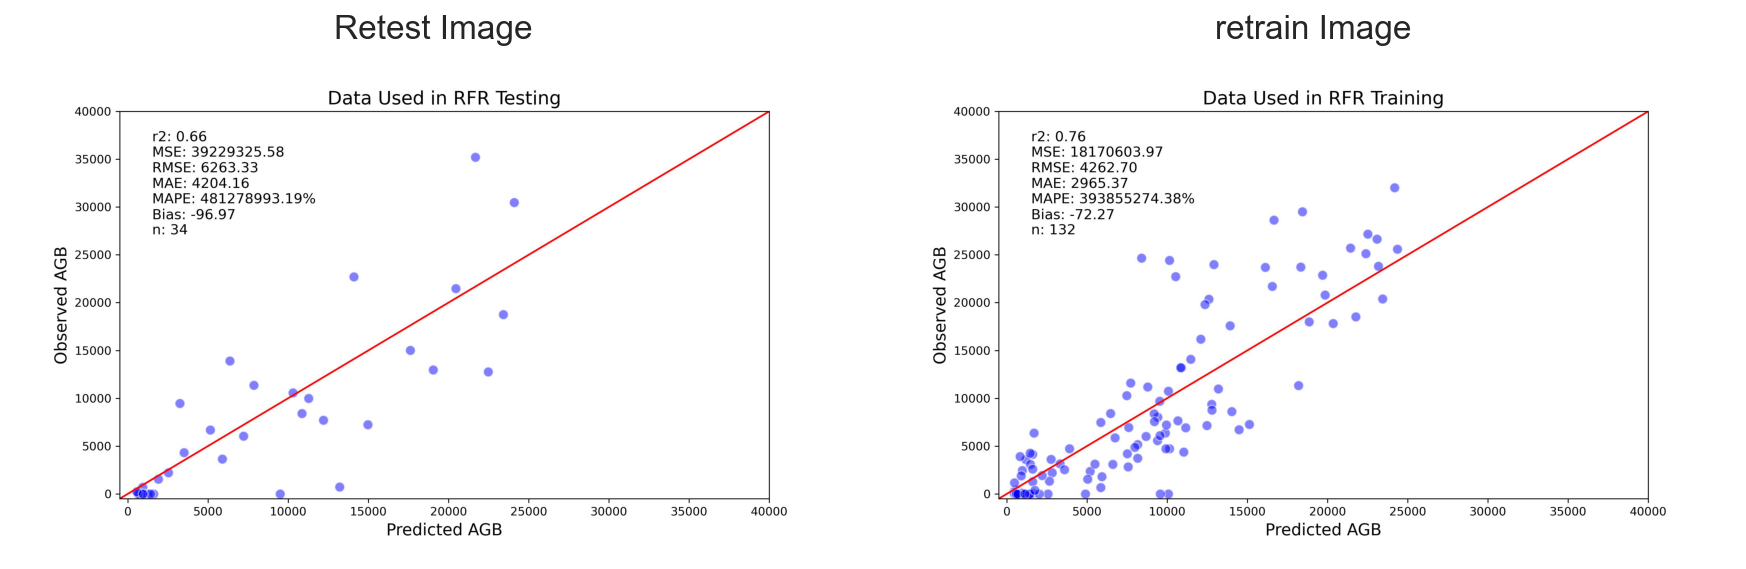

----------------------------------------------------------------------------------------------------


,Metric,Retest,Retrain
0,R² (retest),0.6600000000,NaN
1,MSE (retest),39229325.5799999982,NaN
2,RMSE (retest),6263.3300000000,NaN
3,MAE (retest),4204.1600000000,NaN
4,MAPE (retest),481278993.1899999976,NaN
5,Bias (retest),-96.9700000000,NaN
6,N (retest),34.0000000000,NaN


Features Used: ['dbi_GNDVI', 'dbi_GDVI', 'b4_dbi_mean', 'dbi_NBR', 'dbi_NDVI', 'b1_dp1_mean', 'dbi_RI', 'dbi_MSAVI', 'b6_dbi_mean', 'dbi_GSAVI', 'b2_dbi_mean', 'b1_dbi_mean', 'dbi_CVI', 'b3_dp1_mean', 'dbi_MSR']
----------------------------------------------------------------------------------------------------
Path: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/RMSE/sel_num_15
If using - create directory: all01_rs30_RFR_mean_std3_all0_RMSE_sel_num_15
 - Retest Image found: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/RMSE/sel_num_15\AGB_all01_rs30_RFR_RMSE_top_15_retest.JPG
 - retrain Image found: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/RMSE/sel_num_15\AGB_all01_rs30_RFR_RMSE_top_15_retrain.JPG


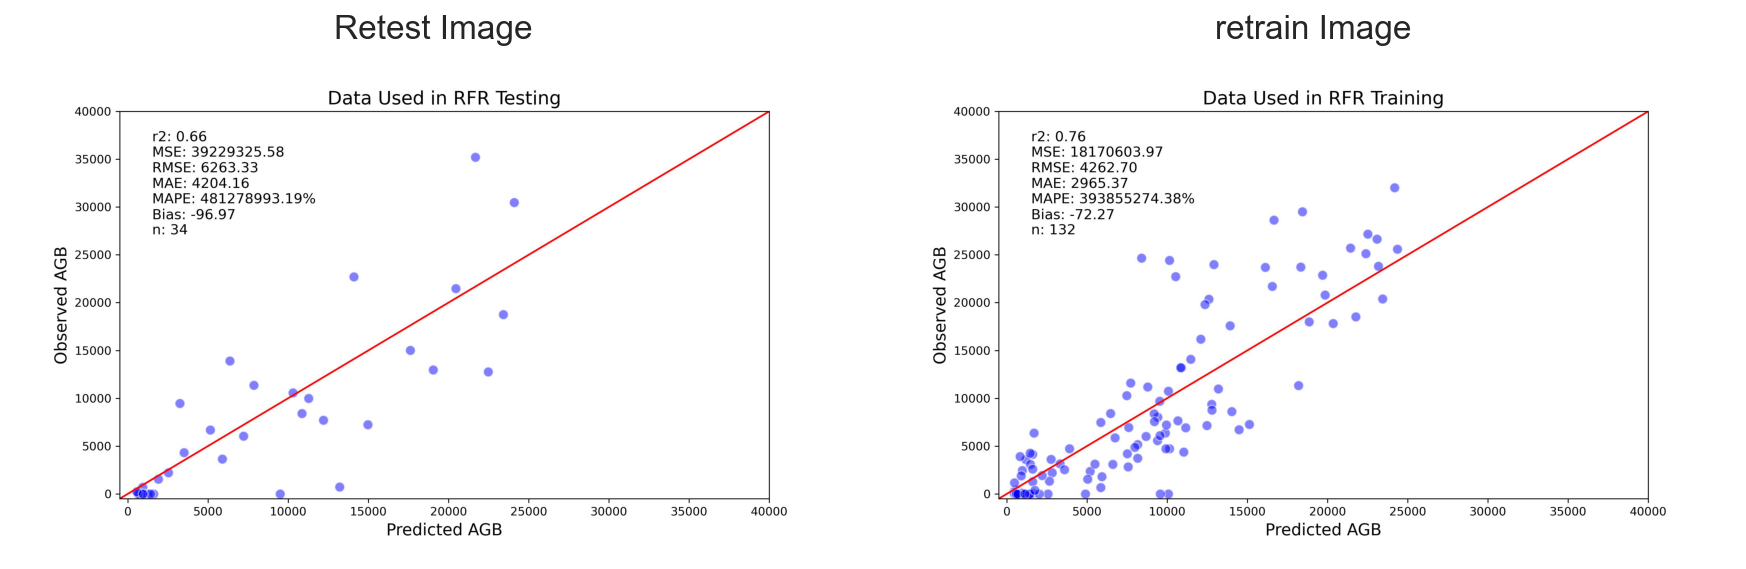

----------------------------------------------------------------------------------------------------


,Metric,Retest,Retrain
0,R² (retest),0.6600000000,NaN
1,MSE (retest),39229325.5799999982,NaN
2,RMSE (retest),6263.3300000000,NaN
3,MAE (retest),4204.1600000000,NaN
4,MAPE (retest),481278993.1899999976,NaN
5,Bias (retest),-96.9700000000,NaN
6,N (retest),34.0000000000,NaN


Features Used: ['dbi_GNDVI', 'dbi_GDVI', 'b4_dbi_mean', 'dbi_NBR', 'dbi_NDVI', 'b1_dp1_mean', 'dbi_RI', 'dbi_MSAVI', 'b6_dbi_mean', 'dbi_GSAVI', 'b2_dbi_mean', 'b1_dbi_mean', 'dbi_CVI', 'b3_dp1_mean', 'dbi_MSR']
----------------------------------------------------------------------------------------------------
Path: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/RMSE/sel_num_12
If using - create directory: all01_rs30_RFR_mean_std3_all0_RMSE_sel_num_12
 - Retest Image found: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/RMSE/sel_num_12\AGB_all01_rs30_RFR_RMSE_top_12_retest.JPG
 - retrain Image found: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/RMSE/sel_num_12\AGB_all01_rs30_RFR_RMSE_top_12_retrain.JPG


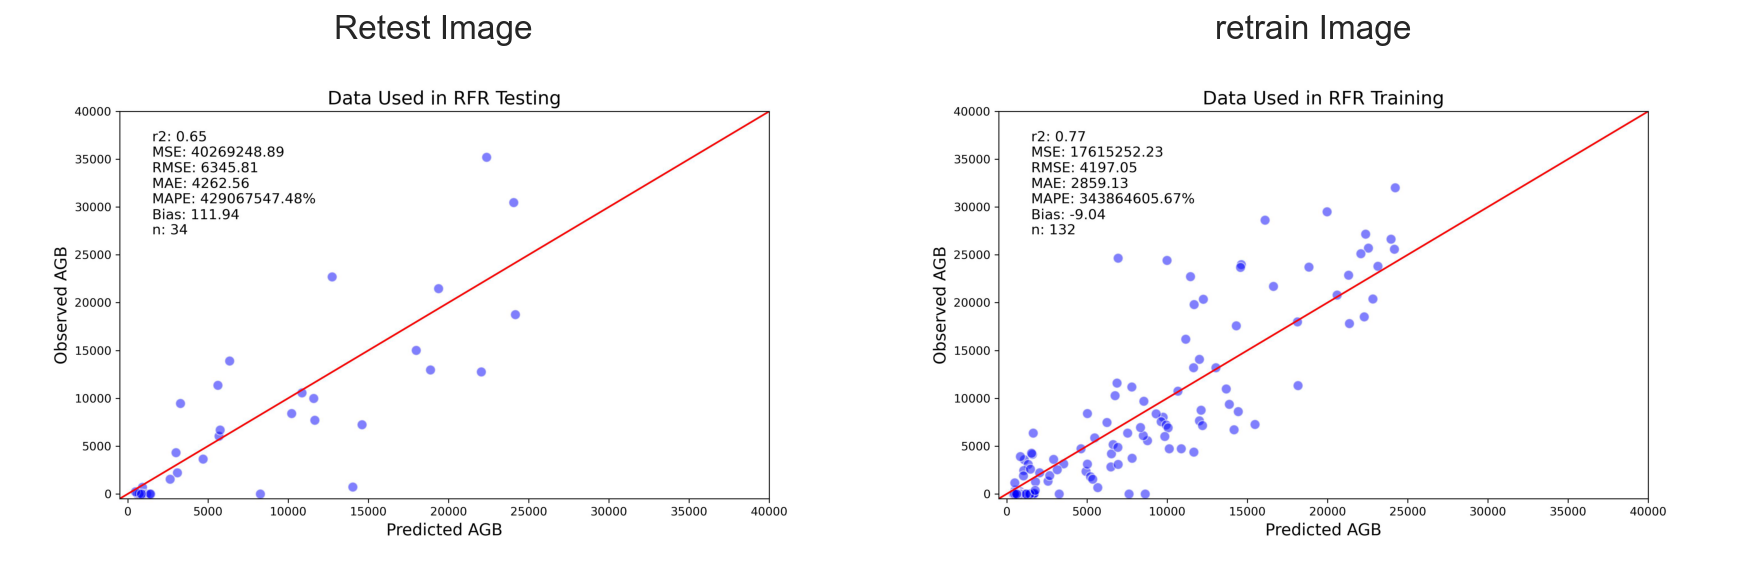

----------------------------------------------------------------------------------------------------


,Metric,Retest,Retrain
0,R² (retest),0.6500000000,NaN
1,MSE (retest),40269248.8900000006,NaN
2,RMSE (retest),6345.8100000000,NaN
3,MAE (retest),4262.5600000000,NaN
4,MAPE (retest),429067547.4800000191,NaN
5,Bias (retest),111.9400000000,NaN
6,N (retest),34.0000000000,NaN


Features Used: ['dbi_MSR', 'b6_dbi_mean', 'dbi_NBR', 'b1_dp1_mean', 'b1_dbi_mean', 'b2_dbi_mean', 'dbi_GDVI', 'b5_dbi_mean', 'dbi_NDVI', 'dbi_GNDVI', 'b3_dp1_mean', 'b4_dbi_mean']
----------------------------------------------------------------------------------------------------
Path: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/RMSE/sel_num_12
If using - create directory: all01_rs30_RFR_mean_std3_all0_RMSE_sel_num_12
 - Retest Image found: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/RMSE/sel_num_12\AGB_all01_rs30_RFR_RMSE_top_12_retest.JPG
 - retrain Image found: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/RMSE/sel_num_12\AGB_all01_rs30_RFR_RMSE_top_12_retrain.JPG


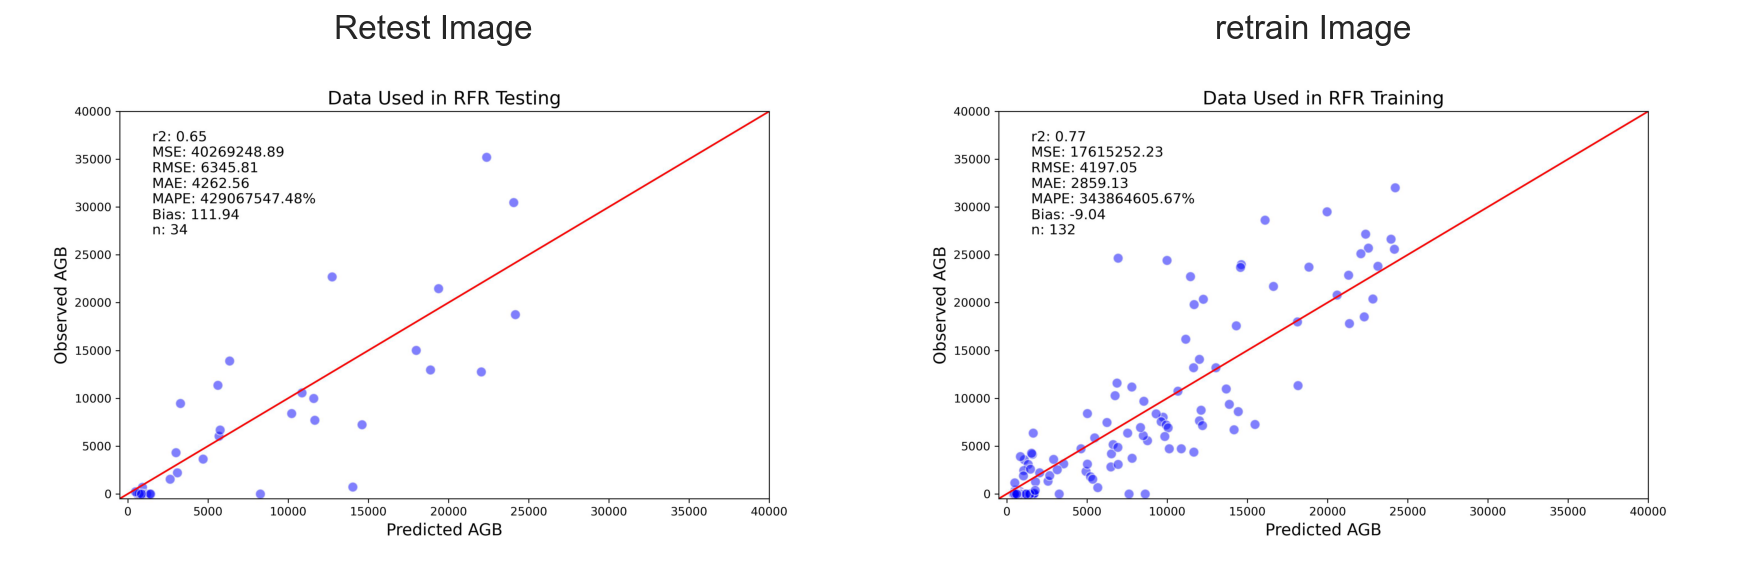

----------------------------------------------------------------------------------------------------


,Metric,Retest,Retrain
0,R² (retest),0.6500000000,NaN
1,MSE (retest),40269248.8900000006,NaN
2,RMSE (retest),6345.8100000000,NaN
3,MAE (retest),4262.5600000000,NaN
4,MAPE (retest),429067547.4800000191,NaN
5,Bias (retest),111.9400000000,NaN
6,N (retest),34.0000000000,NaN


Features Used: ['dbi_MSR', 'b6_dbi_mean', 'dbi_NBR', 'b1_dp1_mean', 'b1_dbi_mean', 'b2_dbi_mean', 'dbi_GDVI', 'b5_dbi_mean', 'dbi_NDVI', 'dbi_GNDVI', 'b3_dp1_mean', 'b4_dbi_mean']
----------------------------------------------------------------------------------------------------
Path: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/r2/sel_num_10
If using - create directory: all01_rs30_RFR_mean_std3_all0_r2_sel_num_10
 - Retest Image found: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/r2/sel_num_10\AGB_all01_rs30_RFR_r2_top_10_retest.JPG
 - retrain Image found: H:/biomass/model_test_train_all01_02_03_04_05_06_final/AGB/all01_rs30/RFR/mean/std3/all0/r2/sel_num_10\AGB_all01_rs30_RFR_r2_top_10_retrain.JPG


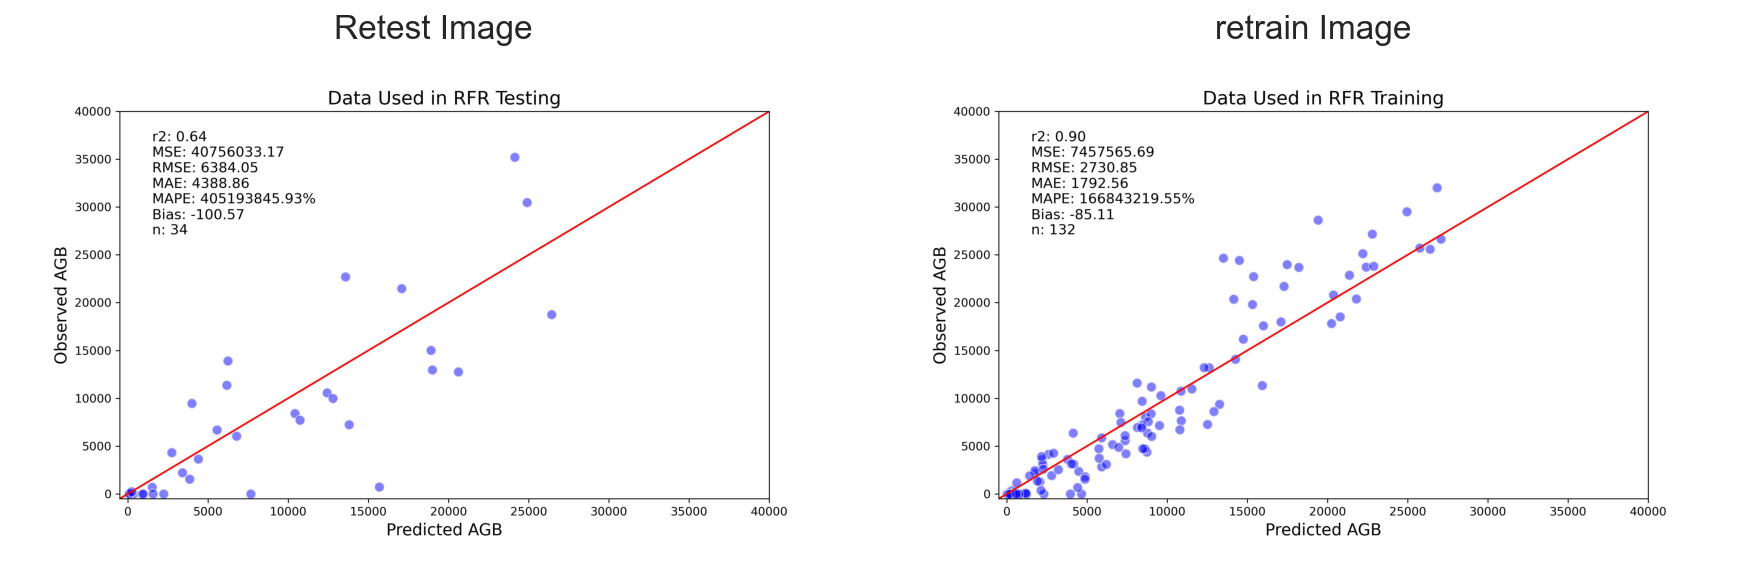

----------------------------------------------------------------------------------------------------


,Metric,Retest,Retrain
0,R² (retest),0.6400000000,NaN
1,MSE (retest),40756033.1700000018,NaN
2,RMSE (retest),6384.0500000000,NaN
3,MAE (retest),4388.8600000000,NaN
4,MAPE (retest),405193845.9300000072,NaN
5,Bias (retest),-100.5700000000,NaN
6,N (retest),34.0000000000,NaN


Features Used: ['b3_dbi_mean', 'b1_dp1_mean', 'b3_dp1_mean', 'dbi_NBR', 'b1_dbi_mean', 'dbi_MSR', 'b6_dbi_mean', 'b2_dp1_mean', 'b5_dbi_mean', 'b2_dbi_mean']
----------------------------------------------------------------------------------------------------
Display limit reached. Adjust the display limit to see more images.
exported to:  C:\Users\robot\code\pipelines\apply_biomass\test_train_all01_02_03_04_05_06_final_top_top_top_top_overall_best.csv


In [17]:
best_df, model_run, model, var, data, std = plot_best_model(mdl_sel_df, model_run, "top", "top", "top", "top", 5)

In [18]:
best_df.to_csv(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_rs30_all06_overall_best.csv".format(model_run, model, var, data, std))
print(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_rs30_all06_overall_best.csv".format(model_run, model, var, data, std))

C:\Users\robot\code\pipelines\apply_biomass\test_train_all01_02_03_04_05_06_final_top_top_top_top_rs30_all01_overall_best.csv


In [19]:
best_df

,r2_retrain,mse_retrain,rmse_retrain,mae_retrain,mape_retrain,bias_retrain,n_retrain,status_retrain,features_retrain,r2_retest,...,fac,stdev,sel_num,data,stats,features_retest,model,file,file_path,apply_mdl
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6600000000,...,RMSE,3,15,all0,mean,"['dbi_GNDVI', 'dbi_GDVI', 'b4_dbi_mean', 'dbi_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_15_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6600000000,...,RMSE,3,15,all0,mean,"['dbi_GNDVI', 'dbi_GDVI', 'b4_dbi_mean', 'dbi_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_15_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6500000000,...,RMSE,3,12,all0,mean,"['dbi_MSR', 'b6_dbi_mean', 'dbi_NBR', 'b1_dp1_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_12_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6500000000,...,RMSE,3,12,all0,mean,"['dbi_MSR', 'b6_dbi_mean', 'dbi_NBR', 'b1_dp1_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_12_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6400000000,...,r2,3,10,all0,mean,"['b3_dbi_mean', 'b1_dp1_mean', 'b3_dp1_mean', ...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_10_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,RMSE,3,40,all0,mean,"['dbi_GNDVI', 'dbi_NDVI', 'b5_dbi_mean', 'b1_d...","GradientBoostingRegressor(learning_rate=0.05, ...",all01_rs30_RMSE_GBR_sel_40_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,RMSE,3,20,all0,mean,"['b1_dbi_mean', 'b6_dbi_mean', 'dbi_GNDVI', 'b...",AdaBoostRegressor(estimator=DecisionTreeRegres...,all01_rs30_RMSE_ABR_sel_20_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,RMSE,3,20,all0,mean,"['b1_dbi_mean', 'b6_dbi_mean', 'dbi_GNDVI', 'b...",AdaBoostRegressor(estimator=DecisionTreeRegres...,all01_rs30_RMSE_ABR_sel_20_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,r2,3,10,all0,mean,"['dbi_NBR', 'dbi_MSR', 'b4_dbi_mean', 'dbi_GND...","GradientBoostingRegressor(max_features='sqrt',...",all01_rs30_r2_GBR_sel_10_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN


In [20]:
best_df

,r2_retrain,mse_retrain,rmse_retrain,mae_retrain,mape_retrain,bias_retrain,n_retrain,status_retrain,features_retrain,r2_retest,...,fac,stdev,sel_num,data,stats,features_retest,model,file,file_path,apply_mdl
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6600000000,...,RMSE,3,15,all0,mean,"['dbi_GNDVI', 'dbi_GDVI', 'b4_dbi_mean', 'dbi_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_15_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6600000000,...,RMSE,3,15,all0,mean,"['dbi_GNDVI', 'dbi_GDVI', 'b4_dbi_mean', 'dbi_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_15_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6500000000,...,RMSE,3,12,all0,mean,"['dbi_MSR', 'b6_dbi_mean', 'dbi_NBR', 'b1_dp1_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_12_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6500000000,...,RMSE,3,12,all0,mean,"['dbi_MSR', 'b6_dbi_mean', 'dbi_NBR', 'b1_dp1_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_12_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6400000000,...,r2,3,10,all0,mean,"['b3_dbi_mean', 'b1_dp1_mean', 'b3_dp1_mean', ...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_10_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,RMSE,3,40,all0,mean,"['dbi_GNDVI', 'dbi_NDVI', 'b5_dbi_mean', 'b1_d...","GradientBoostingRegressor(learning_rate=0.05, ...",all01_rs30_RMSE_GBR_sel_40_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,RMSE,3,20,all0,mean,"['b1_dbi_mean', 'b6_dbi_mean', 'dbi_GNDVI', 'b...",AdaBoostRegressor(estimator=DecisionTreeRegres...,all01_rs30_RMSE_ABR_sel_20_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,RMSE,3,20,all0,mean,"['b1_dbi_mean', 'b6_dbi_mean', 'dbi_GNDVI', 'b...",AdaBoostRegressor(estimator=DecisionTreeRegres...,all01_rs30_RMSE_ABR_sel_20_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,r2,3,10,all0,mean,"['dbi_NBR', 'dbi_MSR', 'b4_dbi_mean', 'dbi_GND...","GradientBoostingRegressor(max_features='sqrt',...",all01_rs30_r2_GBR_sel_10_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN


In [21]:
# Find the model with the lowest RMSE
best_perform_model = best_df.loc[best_df['rmse_retest'].idxmin()]

# Calculate summary statistics
summary_stats = best_df.describe()

# Output results
print("Summary Statistics:")
print(summary_stats)
print("\nModel with the Lowest RMSE:")
print(best_perform_model)

Summary Statistics:
        r2_retrain  mse_retrain  rmse_retrain  mae_retrain  mape_retrain  \
count 0.0000000000 0.0000000000  0.0000000000 0.0000000000  0.0000000000   
mean           NaN          NaN           NaN          NaN           NaN   
std            NaN          NaN           NaN          NaN           NaN   
min            NaN          NaN           NaN          NaN           NaN   
25%            NaN          NaN           NaN          NaN           NaN   
50%            NaN          NaN           NaN          NaN           NaN   
75%            NaN          NaN           NaN          NaN           NaN   
max            NaN          NaN           NaN          NaN           NaN   

       bias_retrain    n_retrain      r2_retest          mse_retest  \
count  0.0000000000 0.0000000000 176.0000000000      176.0000000000   
mean            NaN          NaN   0.6156818182 44122330.6522727236   
std             NaN          NaN   0.0132488667  1528369.6779144483   
min        

In [22]:
# Normalise metrics
best_df['RMSE_norm'] = best_df['rmse_retest'] / best_df['rmse_retest'].max()  # Lower is better
best_df['MAE_norm'] = best_df['mae_retest'] / best_df['mae_retest'].max()    # Lower is better
best_df['R2_norm'] = 1 - ((best_df['r2_retest'].max() - best_df['r2_retest']) / (best_df['r2_retest'].max() - best_df['r2_retest'].min()))  # Higher is better

# Assign weights to each metric (optional)
weights = {'rmse_retest': 0.8, 'mae_retest': 0.1, 'r2_retest': 0.1}

# Calculate combined score
best_df['Score'] = (
    best_df['RMSE_norm'] * weights['rmse_retest'] +
    best_df['MAE_norm'] * weights['mae_retest'] +
    best_df['R2_norm'] * weights['r2_retest']
)

# Rank models based on the score
best_df['Rank'] = best_df['Score'].rank(ascending=True)

# Sort by rank
df_rank = best_df.sort_values(by='Rank')

# Output results
df_rank[['mdl', 'rmse_retest', 'mae_retest', 'r2_retest', 'Score', 'Rank', 'file_path']]

,mdl,rmse_retest,mae_retest,r2_retest,Score,Rank,file_path
1519,GBR,6760.1400000000,4253.2000000000,0.6000000000,0.8808763600,1.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...
79,GBR,6760.1400000000,4253.2000000000,0.6000000000,0.8808763600,1.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...
1505,ABR,6745.3500000000,4438.4000000000,0.6000000000,0.8829158835,3.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...
65,ABR,6745.3500000000,4438.4000000000,0.6000000000,0.8829158835,3.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...
24,ABR,6745.2900000000,4472.4700000000,0.6000000000,0.8836036563,5.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...
...,...,...,...,...,...,...,...
1456,RFR,6345.8100000000,4262.5600000000,0.6500000000,0.9157278101,171.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...
202,XGBR,6463.8700000000,4652.0800000000,0.6400000000,0.9208739011,173.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...
1642,XGBR,6463.8700000000,4652.0800000000,0.6400000000,0.9208739011,173.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...
15,RFR,6263.3300000000,4204.1600000000,0.6600000000,0.9215142620,175.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...


In [23]:
# Group by 'mdl' and get the best rank (minimum score) per model
best_rank_per_model = df_rank.groupby('mdl', as_index=False).first()

# Sort the models by Rank for clear display
best_rank_per_model = best_rank_per_model.sort_values(by='Rank')

# Output the results
print("Best Rank for Each Model:")
best_rank_per_model[['mdl', 'rmse_retest', 'mae_retest', 'r2_retest', 'Score', 'Rank', 'file_path']]


Best Rank for Each Model:


,mdl,rmse_retest,mae_retest,r2_retest,Score,Rank,file_path
1,GBR,6760.1400000000,4253.2000000000,0.6000000000,0.8808763600,1.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...
0,ABR,6745.3500000000,4438.4000000000,0.6000000000,0.8829158835,3.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...
3,RFR,6742.6200000000,4533.9400000000,0.6000000000,0.8845436170,9.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...
4,XGBR,6790.5600000000,4474.1000000000,0.6000000000,0.8889549210,30.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...
2,KNN,6783.4100000000,4835.1200000000,0.6000000000,0.8954776022,77.5000000000,H:/biomass/model_test_train_all01_02_03_04_05_...


In [24]:
# Group by 'mdl' and find the row with the minimum 'rmse_retest' for each model
lowest_rmse_df = best_df.loc[best_df.groupby('mdl')['rmse_retest'].idxmin()]
# Reset index for cleaner presentation
lowest_rmse_df = lowest_rmse_df.reset_index(drop=True)

# Display the table with the lowest RMSE per model
print("Table of Lowest RMSE for Each Model:")
lowest_rmse_df

Table of Lowest RMSE for Each Model:


,r2_retrain,mse_retrain,rmse_retrain,mae_retrain,mape_retrain,bias_retrain,n_retrain,status_retrain,features_retrain,r2_retest,...,features_retest,model,file,file_path,apply_mdl,RMSE_norm,MAE_norm,R2_norm,Score,Rank
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6300000000,...,"['b1_dbi_mean', 'b5_dbi_mean', 'b6_dbi_mean', ...",AdaBoostRegressor(estimator=DecisionTreeRegres...,all01_rs30_RMSE_ABR_sel_40_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9521839047,0.8728989155,0.5000000000,0.8990370153,107.5000000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6400000000,...,"['dbi_GDVI', 'b2_dp1_mean', 'b1_dbi_mean', 'db...",GradientBoostingRegressor(),all01_rs30_RMSE_GBR_sel_15_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9411707697,0.8416533766,0.6666666667,0.9037686201,131.5000000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6200000000,...,"['b3_dbi_p99', 'b3_dp1_p99', 'b2_dp1_p99', 'b1...","KNeighborsRegressor(n_neighbors=7, weights='di...",all01_rs30_MAE_KNN_sel_10_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9694627793,0.9997940213,0.3333333333,0.9088829589,157.5000000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6600000000,...,"['dbi_GNDVI', 'dbi_GDVI', 'b4_dbi_mean', 'dbi_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_15_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9197186511,0.8573934111,1.0000000000,0.9215142620,175.5000000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6400000000,...,"['b2_dbi_p99', 'dbi_NDVI', 'dbi_NBR', 'b2_dp1_...","XGBRegressor(base_score=None, booster=None, ca...",all01_rs30_MAE_XGBR_sel_12_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9491663057,0.9487418985,0.6666666667,0.9208739011,173.5000000000


In [25]:
best_rank_per_model.to_csv(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_AGB_best_model_results_rs30_all06.csv".format(model_run, model, var, data, std))
#best_rank_per_model.to_csv(r"H:\biomass\model_test_train_all01_02_03_04_05_06_final\AGB_best_model_results_rs30_all06.csv", index=False)
print(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_AGB_best_model_results_rs30_all06.csv".format(model_run, model, var, data, std))

C:\Users\robot\code\pipelines\apply_biomass\test_train_all01_02_03_04_05_06_final_top_top_top_top_AGB_best_model_results_rs30_all01.csv


In [26]:
grouped_df = best_df.groupby(['mdl'])[['rmse_retest', 'r2_retest', 'mae_retest']].agg(['mean', 'std']).reset_index()
grouped_df


mdl     rmse_retest                   r2_retest               \
                   mean            std         mean          std   
0   ABR 6666.2065384615  95.8446775325 0.6119230769 0.0104859311   
1   GBR 6651.7561538462 108.7374016639 0.6138461538 0.0116882584   
2   KNN 6698.7166666667  60.8877042244 0.6105555556 0.0071492035   
3   RFR 6540.8665000000 131.0485190351 0.6270000000 0.0157219429   
4  XGBR 6659.9972727273 102.6645562329 0.6145454545 0.0126217019   

       mae_retest                 
             mean            std  
0 4396.9907692308  87.2493255403  
1 4365.3000000000 140.5091917847  
2 4752.8355555556 154.0959798575  
3 4425.9360000000 125.4208838129  
4 4407.8745454545  97.3038210343

In [27]:
best_df

,r2_retrain,mse_retrain,rmse_retrain,mae_retrain,mape_retrain,bias_retrain,n_retrain,status_retrain,features_retrain,r2_retest,...,features_retest,model,file,file_path,apply_mdl,RMSE_norm,MAE_norm,R2_norm,Score,Rank
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6600000000,...,"['dbi_GNDVI', 'dbi_GDVI', 'b4_dbi_mean', 'dbi_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_15_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9197186511,0.8573934111,1.0000000000,0.9215142620,175.5000000000
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6600000000,...,"['dbi_GNDVI', 'dbi_GDVI', 'b4_dbi_mean', 'dbi_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_15_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9197186511,0.8573934111,1.0000000000,0.9215142620,175.5000000000
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6500000000,...,"['dbi_MSR', 'b6_dbi_mean', 'dbi_NBR', 'b1_dp1_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_12_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9318301628,0.8693034657,0.8333333333,0.9157278101,171.5000000000
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6500000000,...,"['dbi_MSR', 'b6_dbi_mean', 'dbi_NBR', 'b1_dp1_...","RandomForestRegressor(max_depth=3, max_feature...",all01_rs30_RMSE_RFR_sel_12_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9318301628,0.8693034657,0.8333333333,0.9157278101,171.5000000000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6400000000,...,"['b3_dbi_mean', 'b1_dp1_mean', 'b3_dp1_mean', ...","RandomForestRegressor(max_depth=10, max_featur...",all01_rs30_r2_RFR_sel_10_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9374453932,0.8950609982,0.6666666667,0.9061290811,147.5000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,"['dbi_GNDVI', 'dbi_NDVI', 'b5_dbi_mean', 'b1_d...","GradientBoostingRegressor(learning_rate=0.05, ...",all01_rs30_RMSE_GBR_sel_40_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9981747564,0.9025639248,0.0000000000,0.8887961976,27.5000000000
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,"['b1_dbi_mean', 'b6_dbi_mean', 'dbi_GNDVI', 'b...",AdaBoostRegressor(estimator=DecisionTreeRegres...,all01_rs30_RMSE_ABR_sel_20_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9992232069,0.9315906041,0.0000000000,0.8925376259,57.5000000000
1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,"['b1_dbi_mean', 'b6_dbi_mean', 'dbi_GNDVI', 'b...",AdaBoostRegressor(estimator=DecisionTreeRegres...,all01_rs30_RMSE_ABR_sel_20_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,0.9992232069,0.9315906041,0.0000000000,0.8925376259,57.5000000000
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,...,"['dbi_NBR', 'dbi_MSR', 'b4_dbi_mean', 'dbi_GND...","GradientBoostingRegressor(max_features='sqrt',...",all01_rs30_r2_GBR_sel_10_variable_score.csv,H:/biomass/model_test_train_all01_02_03_04_05_...,NaN,1.0000000000,0.9166948783,0.0000000000,0.8916694878,47.5000000000
